In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Step 1: Loading and understanding the dataset

In [5]:
#Load the dataset
df1 = pd.read_csv("smmh.csv")

In [6]:
# Make a working copy
df = df1.copy()

In [7]:
#Check structure
print(f"Number of rows: {df.shape[0]} and columns: {df.shape[1]}\n")

Number of rows: 481 and columns: 21



In [8]:
print(df.columns.tolist())


['Timestamp', '1. What is your age?', '2. Gender', '3. Relationship Status', '4. Occupation Status', '5. What type of organizations are you affiliated with?', '6. Do you use social media?', '7. What social media platforms do you commonly use?', '8. What is the average time you spend on social media every day?', '9. How often do you find yourself using Social media without a specific purpose?', '10. How often do you get distracted by Social media when you are busy doing something?', "11. Do you feel restless if you haven't used Social media in a while?", '12. On a scale of 1 to 5, how easily distracted are you?', '13. On a scale of 1 to 5, how much are you bothered by worries?', '14. Do you find it difficult to concentrate on things?', '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?', '16. Following the previous question, how do you feel about these comparisons, generally speaking?', '17. How often do you look to seek

In [9]:
display(df.head())

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


Check for datatype and 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

Based on all these columns , I can say below variables as target variable and feature

There are three type of columns(Classify the columns)

    1. Feature variable (column number and a line to explain why)
    2. Target variable 
    3. Timestamp  (0th columb)

In [11]:
#Classify categorical vs numerical
categorical_cols = df.select_dtypes(include='object')
numerical_cols = df.select_dtypes(include=np.number)
#target_cols = df.select_ ->all
#feature_cols

Data types tell you if variables are numerical, categorical, or dates.
Helps you decide what kind of visualizations or transformations to apply.

Missing value analysis tells you which questions were skipped — important for cleaning.

**Investigation of categorical columns**

In [12]:
# Check unique values in categorical columns
for col in categorical_cols:
    print(df[col].value_counts())

Timestamp
5/11/2022 22:54:32     2
4/18/2022 19:18:47     1
5/11/2022 22:38:29     1
5/11/2022 22:34:14     1
5/11/2022 22:33:56     1
                      ..
4/20/2022 0:07:24      1
4/20/2022 0:00:36      1
4/19/2022 23:53:34     1
4/19/2022 23:51:19     1
11/12/2022 13:16:50    1
Name: count, Length: 480, dtype: int64
2. Gender
Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: count, dtype: int64
3. Relationship Status
Single               285
Married              101
In a relationship     88
Divorced               7
Name: count, dtype: int64
4. Occupation Status
University Student    292
Salaried Worker       132
School Student         49
Retired                 8
Name: count, dtype: int64
5. What type of organizations are you affiliated with?
University                        239
Priv

It shows you only the columns that have missing values in your DataFrame df, along with the count of missing values in each.

**Based on some intution looking for correlation between taregt variable and feature variable**

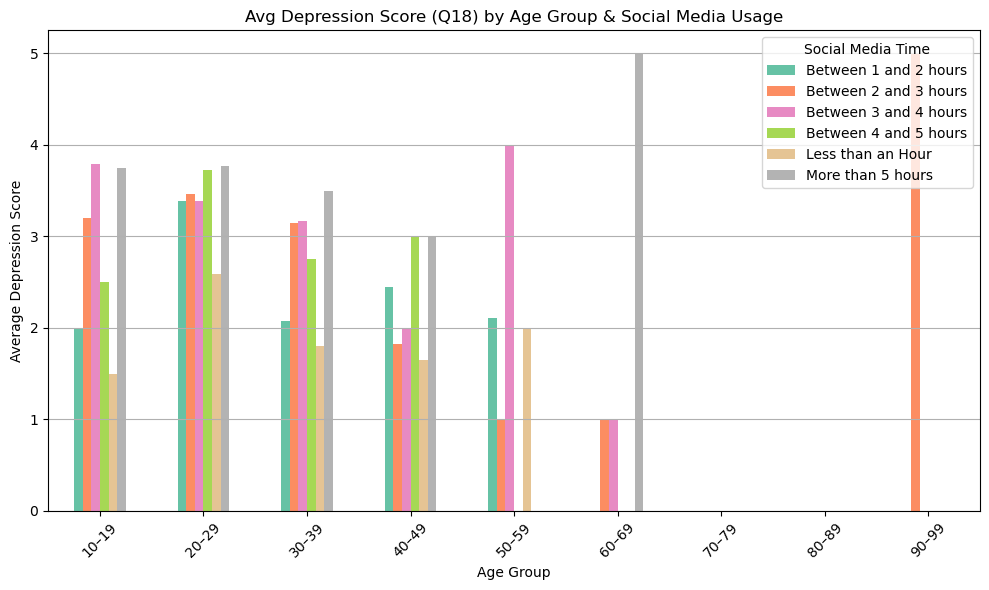

In [13]:

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create age bins and labels
bins = list(range(10, int(df['1. What is your age?'].max()) + 10, 10))
labels = [f"{bins[i]}–{bins[i+1]-1}" for i in range(len(bins)-1)]
df['age_group'] = pd.cut(df['1. What is your age?'], bins=bins, labels=labels, right=False)

# Step 2: Define columns
q18 = '18. How often do you feel depressed or down?'
social_media_col = '8. What is the average time you spend on social media every day?'

# Step 3: Group by age group and social media time
grouped = df.groupby(['age_group', social_media_col])[q18].mean().unstack()

# Step 4: Prepare grouped bar chart (but do not show yet)
grouped.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Avg Depression Score (Q18) by Age Group & Social Media Usage")
plt.xlabel("Age Group")
plt.ylabel("Average Depression Score")
plt.xticks(rotation=45)
plt.legend(title="Social Media Time")
plt.grid(axis='y')
plt.tight_layout()

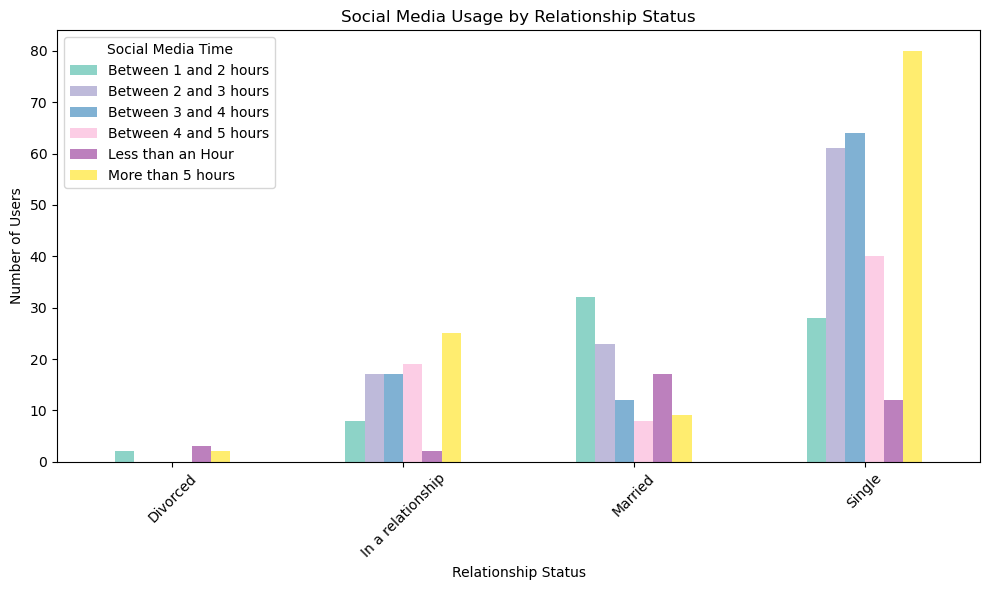

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("smmh.csv")

# Define the columns
rel_col = '3. Relationship Status'
time_col = '8. What is the average time you spend on social media every day?'

# Create grouped count (how many people in each relationship status use social media X hours)
grouped = df.groupby([rel_col, time_col]).size().unstack(fill_value=0)

# Prepare grouped bar plot (but don’t show it yet)
grouped.plot(kind='bar', figsize=(10, 6), colormap='Set3')
plt.title("Social Media Usage by Relationship Status")
plt.xlabel("Relationship Status")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.legend(title="Social Media Time")
plt.tight_layout()

# ⚠️ Run plt.show() when ready to view the plot


In [15]:
# Step 1: Create Age Group column
bins = [0, 18, 25, 35, 50, 100]
labels = ['<18', '18-25', '26-35', '36-50', '50+']
df['Age Group'] = pd.cut(df['1. What is your age?'], bins=bins, labels=labels)


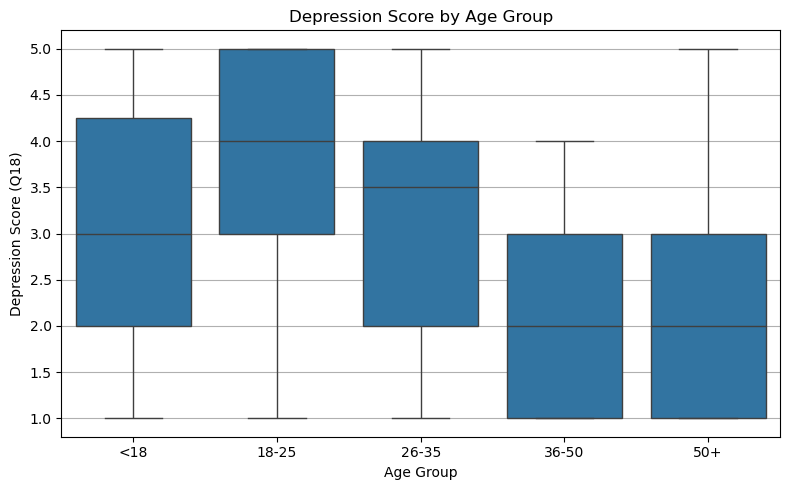

In [16]:
# Step 2: Boxplot by Age Group
plt.figure(figsize=(8, 5))
sns.boxplot(x='Age Group', y='18. How often do you feel depressed or down?', data=df)
plt.title("Depression Score by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Depression Score (Q18)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Younger age groups (18–25 and 26–35) tend to report higher depression scores, with some individuals reaching the max score of 5.

Older age groups (36–60) seem to have lower depression scores on average and narrower spread (less variance).

The 60+ group shows a wider range again, possibly due to smaller sample size or varying life situations.



In [17]:
# Clean gender column
df['2. Gender'] = df['2. Gender'].str.strip().str.lower()

gender_map = {
    'male': 'Male',
    'female': 'Female',
    'nonbinary': 'Non-binary',
    'nb': 'Non-binary',
    'trans': 'Trans',
    'transnonbinary': 'Trans',
    'others': 'Other',
    'other': 'Other',
    '???': 'Other',
    'unsure': 'Other'
}

df['Gender Cleaned'] = df['2. Gender'].map(gender_map).fillna('Other')


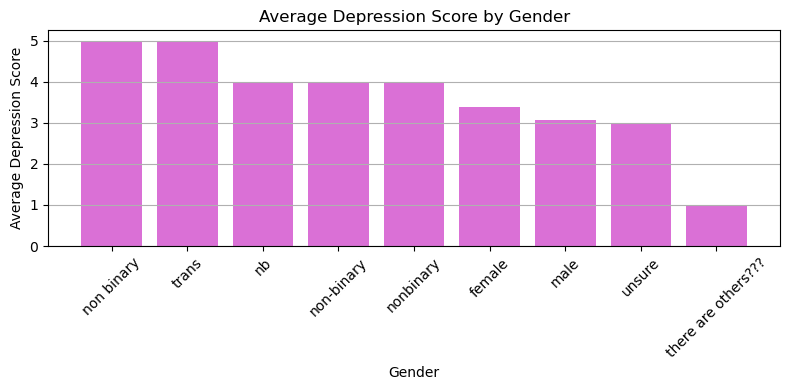

In [18]:
target = '18. How often do you feel depressed or down?'

col = '2. Gender'

grouped = df.groupby(col)[target].mean().reset_index().sort_values(by=target, ascending=False)

plt.figure(figsize=(8, 4))
plt.bar(grouped[col], grouped[target], color='orchid')
plt.title("Average Depression Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Depression Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Participants identifying as Trans, Non-binary, or Other genders report higher median depression scores compared to Male and Female participants.

This suggests that individuals outside the binary gender spectrum may be experiencing greater mental health challenges, highlighting the need for more inclusive and targeted support in mental health initiatives.

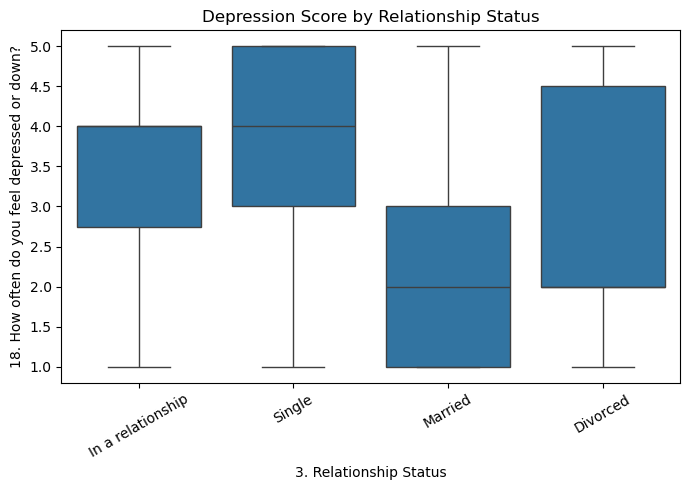

In [19]:
# --------- Plot 3: Depression vs Relationship Status ---------
plt.figure(figsize=(7, 5))
sns.boxplot(x='3. Relationship Status', y='18. How often do you feel depressed or down?', data=df)
plt.title("Depression Score by Relationship Status")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Relationship status appears to influence depression levels.

Individuals who are single or in a relationship show higher median depression scores.

Married participants generally report lower depression scores, indicating potential emotional stability.

Divorced participants also show a wide range in responses, with a slightly higher median than married ones.

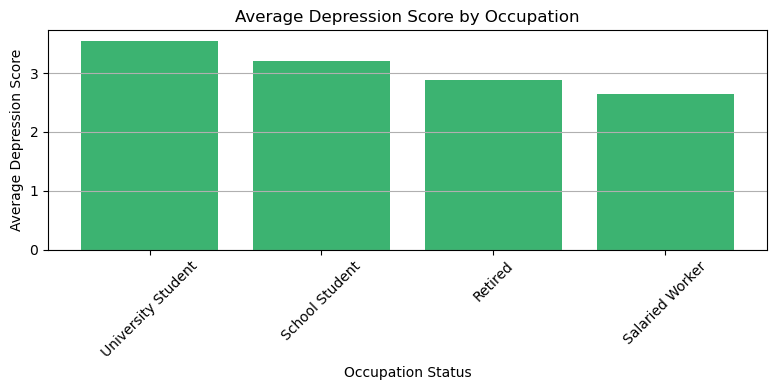

In [20]:
col = '4. Occupation Status'

grouped = df.groupby(col)[target].mean().reset_index().sort_values(by=target, ascending=False)

plt.figure(figsize=(8, 4))
plt.bar(grouped[col], grouped[target], color='mediumseagreen')
plt.title("Average Depression Score by Occupation")
plt.xlabel("Occupation Status")
plt.ylabel("Average Depression Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Occupation status appears to be related to mental health.

University students might be more prone to feeling depressed, possibly due to academic pressure, transition stress, or social factors.

This makes Occupation Status a valuable feature for modeling depression risk.


In [21]:
# Define the column
org_col = '5. What type of organizations are you affiliated with?'

# Define a function to classify into 4 simplified groups
def simplify_org_type(value):
    if pd.isnull(value):
        return 'Unknown'
    orgs = value.lower()
    if ',' in orgs:
        return 'Multiple Affiliations'
    elif 'school' in orgs:
        return 'Only School'
    elif 'university' in orgs:
        return 'Only University'
    elif 'private' in orgs:
        return 'Only Private'
    else:
        return 'Other'

# Apply to create a new column
df['Org Group'] = df[org_col].apply(simplify_org_type)


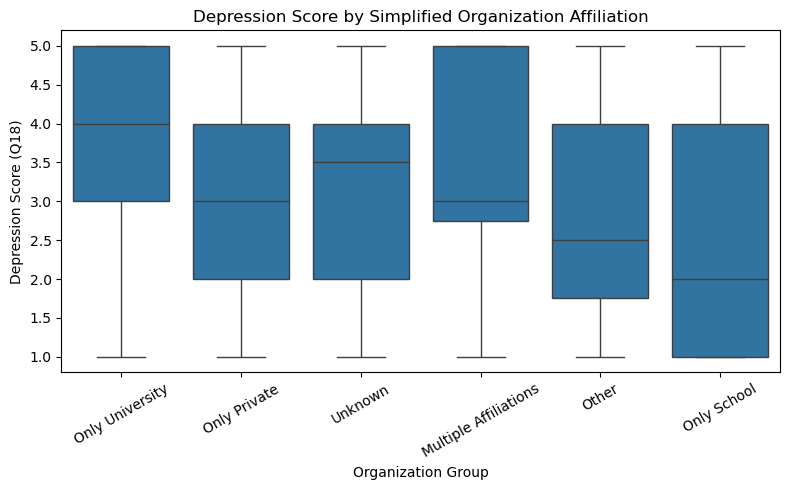

In [22]:
# --------- Plot 5: Depression vs Organization Type ---------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='Org Group', y='18. How often do you feel depressed or down?', data=df)
plt.title("Depression Score by Simplified Organization Affiliation")
plt.xlabel("Organization Group")
plt.ylabel("Depression Score (Q18)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


 Individuals affiliated with multiple organizations (e.g., university, private, school) show the highest median depression scores, indicating that juggling multiple roles may increase stress and emotional burden.

📊 Only School group shows the lowest depression scores, possibly due to lower exposure to external responsibilities.

🧑‍🎓 Only University group also shows a relatively higher median depression score—which aligns with prior findings that university students often experience academic and social pressures.

🏢 Only Private and Unknown/Other groups lie in the middle, suggesting mixed influence or variability in personal and work environments.



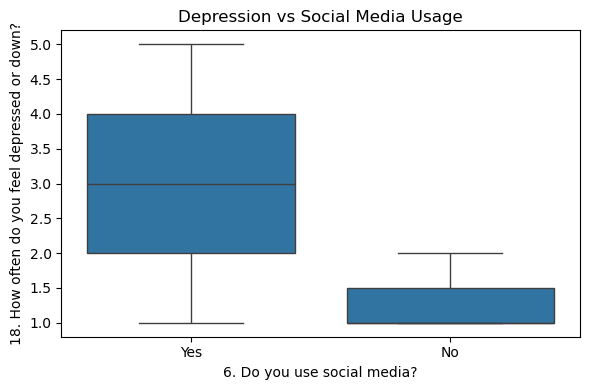

In [23]:
# --------- Plot 6: Depression vs Use of Social Media ---------
plt.figure(figsize=(6, 4))
sns.boxplot(x='6. Do you use social media?', y='18. How often do you feel depressed or down?', data=df)
plt.title("Depression vs Social Media Usage")
plt.tight_layout()
plt.show()

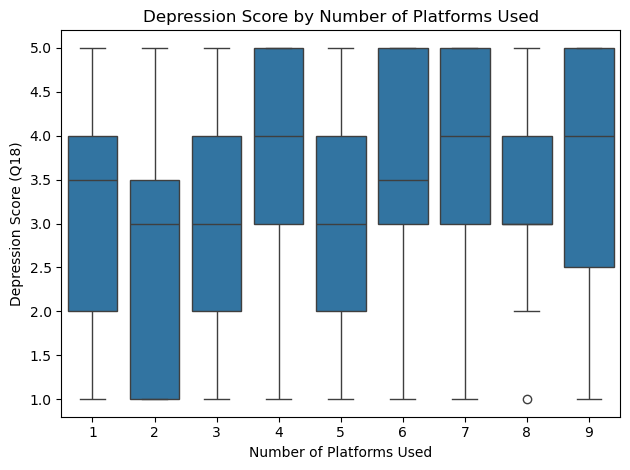

In [24]:
# --------- Plot 7: Depression vs Platforms Used ---------
# Count number of platforms per user
df['platform_count'] = df['7. What social media platforms do you commonly use?'].apply(lambda x: len(str(x).split(',')))
sns.boxplot(x='platform_count', y='18. How often do you feel depressed or down?', data=df)
plt.title("Depression Score by Number of Platforms Used")
plt.xlabel("Number of Platforms Used")
plt.ylabel("Depression Score (Q18)")
plt.tight_layout()
plt.show()



✅ Key Insight – Depression vs Number of Platforms Used:
Upward Trend: As the number of platforms used increases, the median depression score also tends to rise slightly.

Wider Spread: Users who use many platforms (6–9) show a broader range of depression scores, with some reaching the maximum (5). This could indicate more emotional variability.

Lower Depression in Low Users: Those using 1–2 platforms tend to have lower depression scores overall.


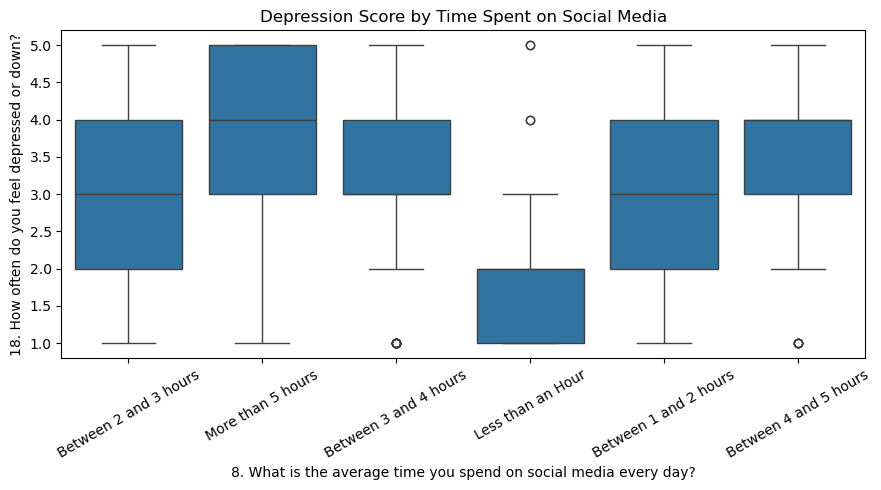

In [25]:
# --------- Plot 8: Depression vs Time Spent on Social Media ---------
plt.figure(figsize=(9, 5))
sns.boxplot(x='8. What is the average time you spend on social media every day?', y='18. How often do you feel depressed or down?', data=df)
plt.title("Depression Score by Time Spent on Social Media")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

“There appears to be a positive association between the amount of time spent on social media and reported depression scores. Participants who spend more than 5 hours daily on social media report the highest median depression levels, while those who spend less than an hour report the lowest. This suggests time spent on social media could be a significant predictor of mental health decline.”

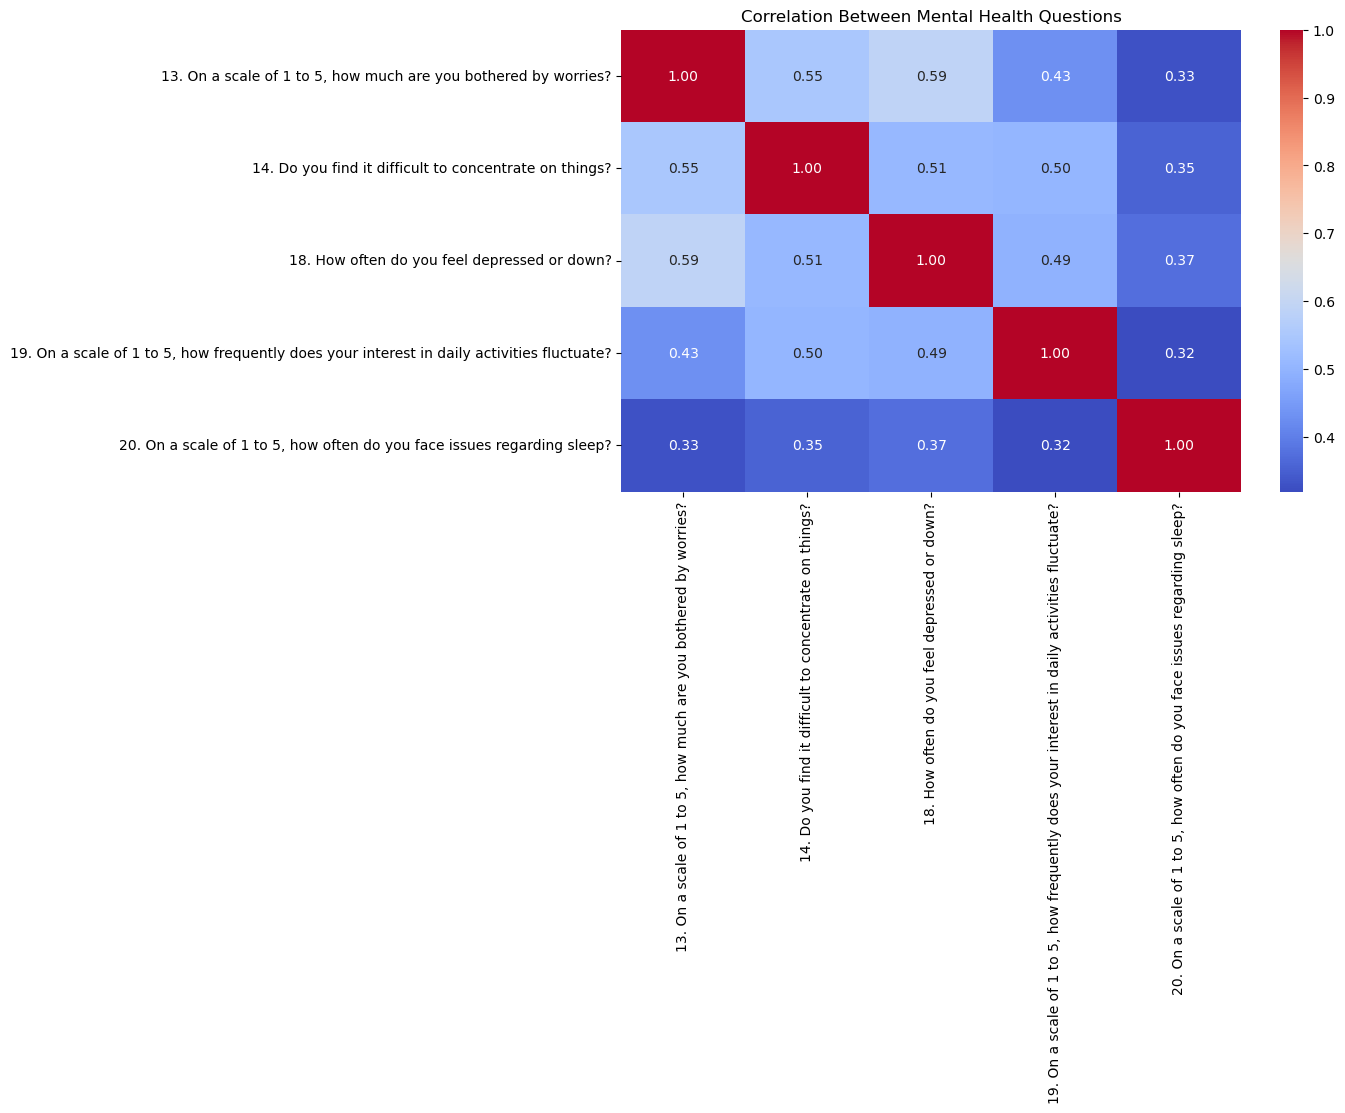

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select mental health-related columns
mental_health_cols = [
    '13. On a scale of 1 to 5, how much are you bothered by worries?',
    '14. Do you find it difficult to concentrate on things?',
    '18. How often do you feel depressed or down?',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?'
]

# Compute correlation matrix
corr_matrix = df[mental_health_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Mental Health Questions')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Correlation matrix shows how well it connects with related symptoms (like worry, concentration, etc.).

You can explain in your report: “Q18 was chosen as the target because it shows moderate to strong correlations with other mental health indicators.”

Variable Pair | Correlation | Observation
Q13 & Q18 (Worry & Depression) | 0.59 | Strongest correlation — makes sense logically.
Q14 & Q18 (Concentration & Depression) | 0.51 | Also quite strong.
Q19 & Q18 (Interest fluctuation & Depression) | 0.49 | Moderate.
Q20 & Q18 (Sleep issues & Depression) | 0.37 | Weaker than others.


Q18. How often do you feel depressed or down? is well correlated with other key mental health indicators.

It is a solid choice for your target variable

You can visually show that depression is not isolated, but connected to other cognitive or emotional challenges.

Based on the correlation matrix, we observe that depression (Q18) is positively correlated with related symptoms such as worry (Q13), concentration issues (Q14), and interest fluctuation (Q19). This confirms that Q18 is an appropriate target variable for further analysis and modeling, as it reflects a central aspect of mental health connected to other psychological indicators.

**Why Analyze Behavioral Social Media Features Now?**

These questions capture emotional + cognitive effects of social media. They directly relate to depression and:

help find deeper psychological patterns

could become the most important predictors in your model

support stronger research findings and insights

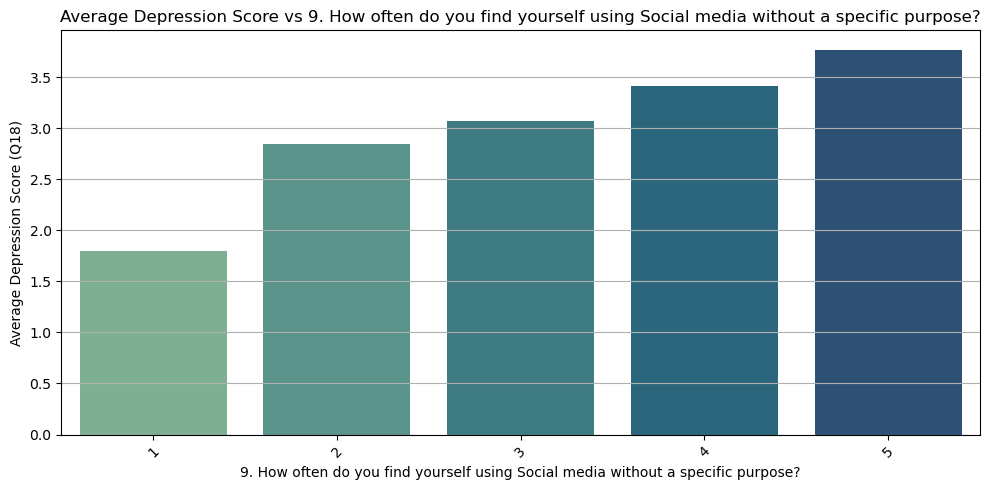

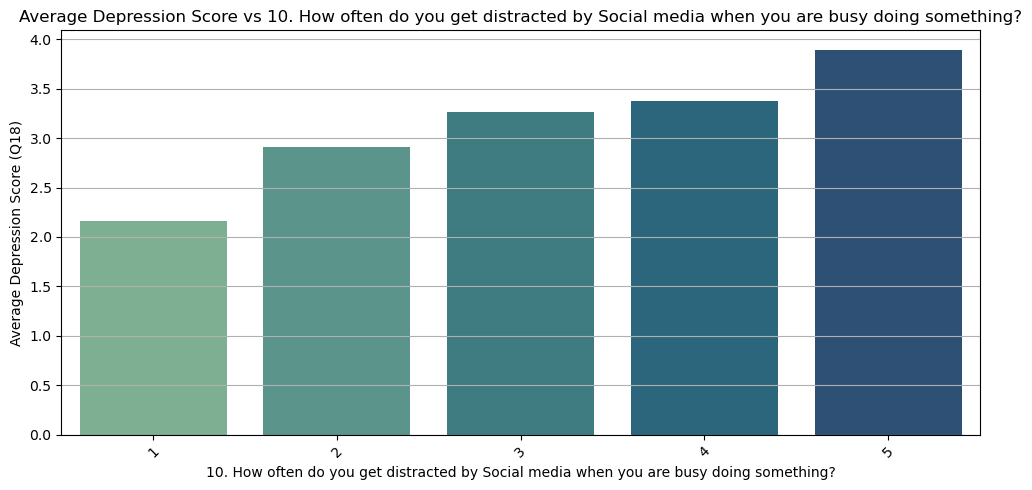

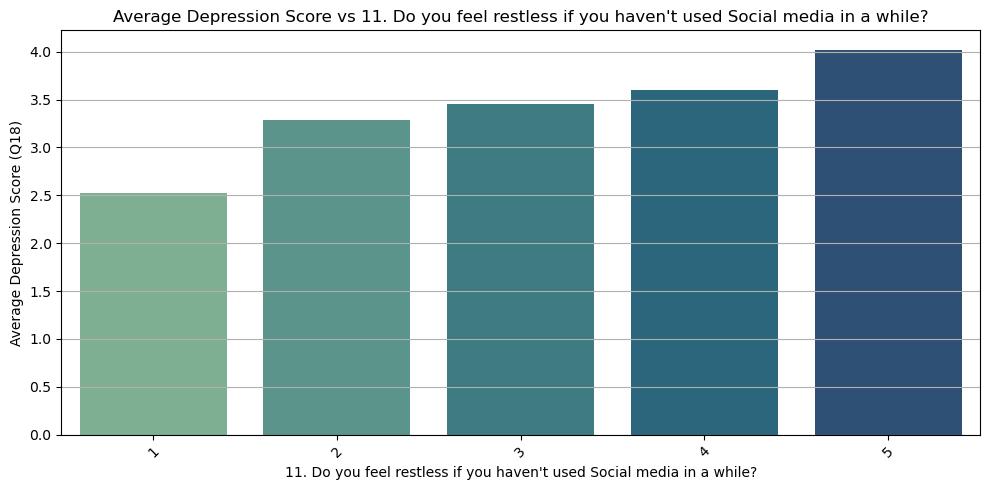

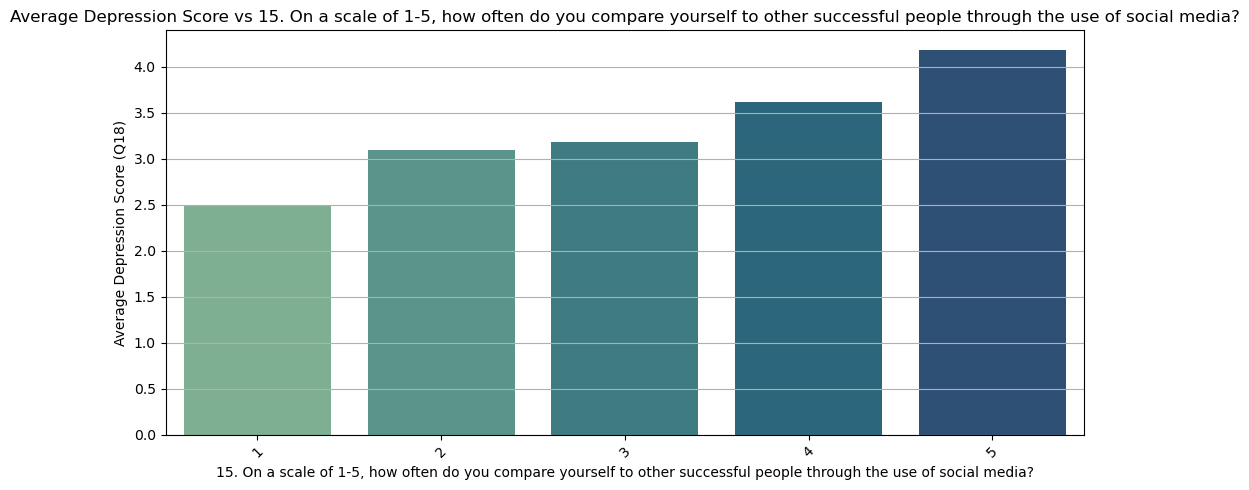

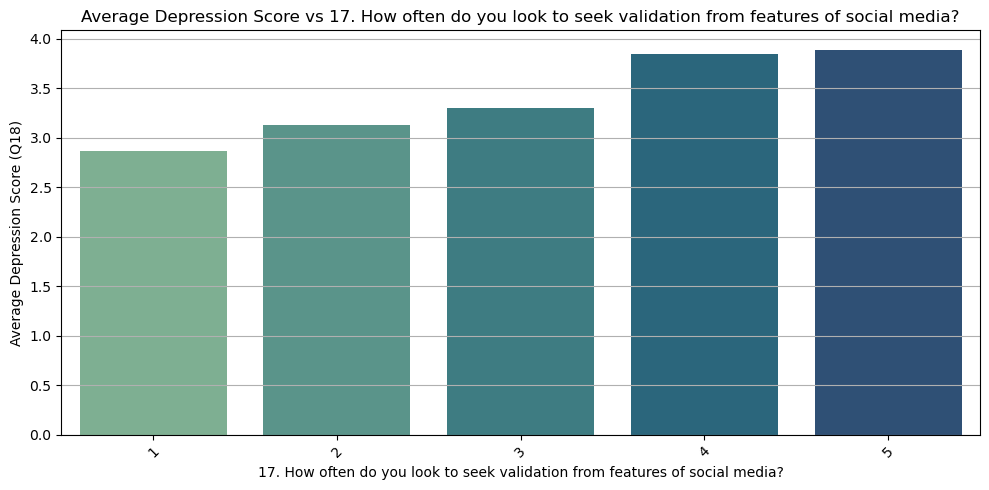

In [27]:
# Define the list of behavioral features
behavior_features = [
    '9. How often do you find yourself using Social media without a specific purpose?',
    '10. How often do you get distracted by Social media when you are busy doing something?',
    '11. Do you feel restless if you haven\'t used Social media in a while?',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
    '17. How often do you look to seek validation from features of social media?'
]
# Bar plot of average depression score per social feature level
for feature in behavior_features:
    plt.figure(figsize=(10, 5))
    avg_df = df.groupby(feature)[target].mean().reset_index()
    sns.barplot(x=feature, y=target, data=avg_df, palette='crest')
    plt.title(f"Average Depression Score vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Average Depression Score (Q18)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()


missing rows needs to be hnadled
Dependencies between mental health